Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.8972 - loss: 0.3280 - val_accuracy: 0.9820 - val_loss: 0.0548
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 65s 34ms/step - accuracy: 0.9850 - loss: 0.0494 - val_accuracy: 0.9873 - val_loss: 0.0390
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9907 - loss: 0.0294 - val_accuracy: 0.9886 - val_loss: 0.0331
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 36ms/step - accuracy: 0.9931 - loss: 0.0214 - val_accuracy: 0.9897 - val_loss: 0.0320
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 64s 34ms/step - accuracy: 0.9951 - loss: 0.0160 - val_accuracy: 0.9906 - val_loss: 0.0314
313/313 - 4s - 11ms/step - accuracy: 0.9906 - loss: 0.0314

Test accuracy: 0.9905999898910522
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step


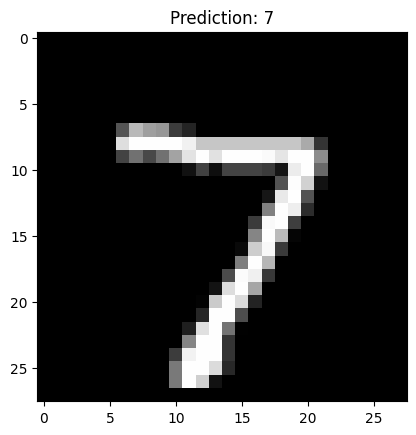

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step


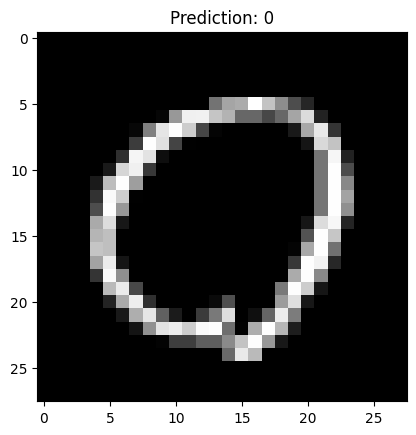

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Normalize values (0–1)
x_train, x_test = x_train / 255.0, x_test / 255.0

# Add channel dimension (CNN expects 3D input)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Build CNN model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("\nTest accuracy:", test_acc)

# Show a prediction
plt.imshow(x_test[0].reshape(28,28), cmap='gray')
plt.title(f"Prediction: {model.predict(x_test[:1]).argmax()}")
plt.show()




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


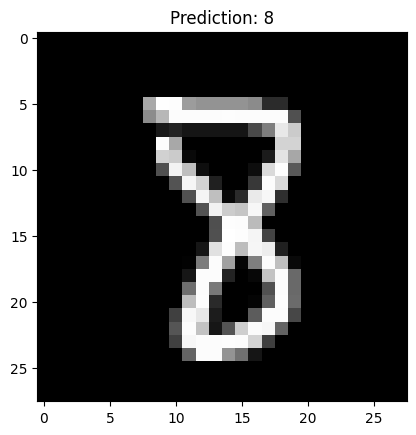

In [6]:
import random
import matplotlib.pyplot as plt

# pick a random test image
index = random.randint(0, len(x_test) - 1)
image = x_test[index]

# show the image
plt.imshow(image.reshape(28,28), cmap="gray")
plt.title(f"Prediction: {model.predict(image.reshape(1,28,28,1)).argmax()}")
plt.show()
